<b>Name</b>: Stella Sun 
<br>
<b>Email</b>: ss8955@nyu.edu
<br>
<b>Contact</b>: 585-369-4043

This experiment is to test the new design of the "message button"; the goal is to improve the discoverbility and the usage of the message feature by members, therefore,I would like to conduct three main steps to illustrate this experiment:
<br>
<br><b>Step1: Data exploration 
<br>Step2: Define appropriate metric to evaluate the success
<br>Step3: Wrap up experiment results and interprete findings

In [1]:
import pandas as pd
import os
from datetime import datetime,date
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

file_path = os.getcwd()

### Step1: EDA(Explotoray Data Analysis)

In this step, I would like to explore all data provided, checking duplicates, missing values, outliers and understanding each field

#### experiment_subjects table

In [2]:
subjects_df = pd.read_csv(file_path + '/experiment_subjects.csv')

In [3]:
subjects_df.head()

,user_id,audience_name,enrolled_at
0,624cf3cb-d23c-4f5d-bbb7-034d9e101576,dark,2017-11-12 16:29:56
1,703fda1a-d406-42d5-98c1-ddc584da80db,dark,2017-11-14 03:49:57
2,02a8cc81-7643-49f1-8c34-58c84155c4ab,dark,2017-11-29 17:02:30
3,8a7b5f34-5283-4f91-ab27-d630fac065b1,dark,2017-11-25 16:17:07
4,a8dc881e-489e-4414-a281-ea3dc1164628,dark,2017-11-24 19:00:19


In [4]:
#First check missing values
subjects_df.isnull().any()

user_id           True
audience_name    False
enrolled_at      False
dtype: bool

In [5]:
subjects_df[subjects_df['user_id'].isnull() == True]

,user_id,audience_name,enrolled_at
17335,NaN,dark,2017-11-13 15:45:28
32506,NaN,light,2017-11-12 16:11:32


In [6]:
subjects_df = subjects_df[subjects_df['user_id'].isnull() == False]

In [7]:
#as user_id should be a unique identifier, now check duplicates in user_id column
subjects_df['user_id'].duplicated().any()

True

In [8]:
subjects_df[subjects_df['user_id'].duplicated() == True]

,user_id,audience_name,enrolled_at
18000,84be1f44-c3e9-46ab-8ea8-da75339d23c6,light,2017-12-02 00:47:03
18889,edf46cfd-ed08-44d9-a363-122b6ad38103,light,2017-11-13 14:27:23
20197,bff9cf7a-fd4b-4ddd-9d65-4c2bf91878c1,light,2017-11-24 02:09:17
20434,d4a2c5f6-40a9-423a-bb6a-f0ba4eebb62f,light,2017-11-22 19:51:27
20939,2f9a5c14-a1d8-41ab-9bf2-ce0a699616b5,light,2017-11-28 12:53:33
21334,52164628-7d3e-4ea2-ad8b-9b927298e7c5,light,2017-11-29 21:55:51
23933,71eb500e-7af8-4e09-a17e-03c5efe808a8,light,2017-11-30 03:07:09
24323,2b3fac45-341a-423f-8350-432084921d21,light,2017-11-14 18:39:08
24553,83d3386f-b800-4373-820e-fb21af095165,light,2017-11-12 22:48:56
24726,5ef75a7b-cb7e-4935-a971-98f6c4f041ce,light,2017-11-18 14:48:50


In [9]:
#remove duplicated user_id
subjects_df = subjects_df[subjects_df['user_id'].duplicated() == False]

In [10]:
#As the contral group and treatment group in the experiment should be completely different user group
#There shouldn't be any user that appear in both group
user_group_overlap = list(set(subjects_df[subjects_df['audience_name'] == 'light']['user_id']) & set(subjects_df[subjects_df['audience_name'] == 'dark']['user_id']))
if len(user_group_overlap) == 0:
    print("No overlap between control and treatment groups, continue")
else:
    print("overlap userid found, double check")

No overlap between control and treatment groups, continue


In [11]:
#function to convert string to date
def convert_string_to_date(s):
    return datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')

In [12]:
#create a new column to store enroll rate
subjects_df['enrolled_date'] = subjects_df['enrolled_at'].apply(lambda x:convert_string_to_date(x).date())

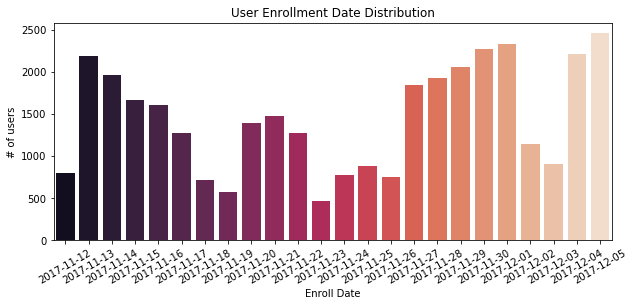

In [13]:
#plot user enrollment date
plt.figure(figsize=(10,4))
g = sns.barplot(x=subjects_df['enrolled_date'].value_counts().sort_index().index.tolist(), y=subjects_df['enrolled_date'].value_counts().sort_index().values.tolist(), palette="rocket")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title("User Enrollment Date Distribution")
plt.xlabel("Enroll Date")
plt.ylabel("# of users")

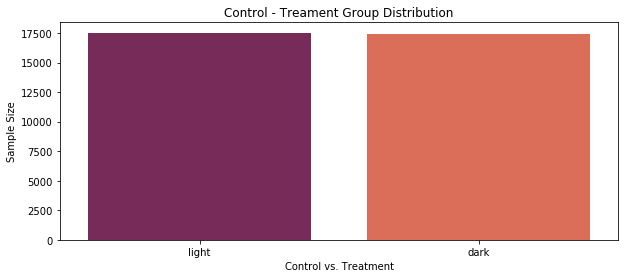

In [14]:
#plot audience group 
plt.figure(figsize=(10,4))
sns.barplot(x=subjects_df['audience_name'].value_counts().index.tolist(), y=subjects_df['audience_name'].value_counts().values.tolist(), palette="rocket")
plt.title("Control - Treament Group Distribution")
plt.xlabel("Control vs. Treatment")
plt.ylabel("Sample Size")

In [16]:
print("Total number of valid users in the experiment:{}".format(subjects_df.shape[0]))

Total number of valid users in the experiment:34935


#### experiment_action table

In [17]:
action_df = pd.read_csv(file_path + '/experiment_actions.csv')

In [18]:
action_df.head()

,user_id,action,new_thread,timestamp
0,24bd5271-63f5-42ec-adc7-9663084076b9,Sent Message,False,2017-11-27 22:49:25
1,230e4564-068d-4f84-addd-04a0df8398d9,Sent Message,True,2017-12-02 15:34:22
2,f4aa80b4-877d-470e-a9a6-8828e371c0fe,Sent Message,True,2017-11-09 22:50:51
3,3b6486b6-54e8-442d-a6e5-b1b6399e67d6,Sent Message,False,2017-12-01 21:50:11
4,56075c0d-cc29-46c3-9013-b265fb10a83e,Sent Message,True,2017-11-03 22:22:03


In [19]:
action_df.isnull().any()

user_id       False
action        False
new_thread     True
timestamp     False
dtype: bool

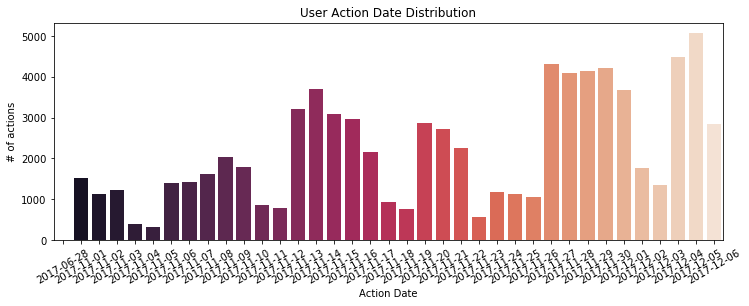

In [20]:
action_df['action_date'] = action_df['timestamp'].apply(lambda x:convert_string_to_date(x).date())
#plot user enrollment date to find outlier
plt.figure(figsize=(12,4))
g = sns.barplot(x=action_df['action_date'].value_counts().sort_index().index.tolist(), y=action_df['action_date'].value_counts().sort_index().values.tolist(), palette="rocket")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title("User Action Date Distribution")
plt.xlabel("Action Date")
plt.ylabel("# of actions")

In [21]:
action_df[action_df['action_date'] == date(2017, 6, 28)]

,user_id,action,new_thread,timestamp,action_date
30916,e956f013-e5a9-4fe9-a273-25a20c469f86,Viewed Messaging Inbox,NaN,2017-06-28 15:18:17,2017-06-28
65724,e956f013-e5a9-4fe9-a273-25a20c469f86,Clicked Messaging Button,NaN,2017-06-28 15:18:17,2017-06-28


In [22]:
#this user seems to be inactive for a long time, so I just removed this user from our table
action_df = action_df[action_df['user_id'] != 'e956f013-e5a9-4fe9-a273-25a20c469f86']

#### messaging table

In [23]:
msg_df = pd.read_csv(file_path + '/messaging_db.csv')

In [24]:
msg_df.head()

,message_id,thread_id,sender_type,timestamp,sender_user_id,recipient_user_id
0,543222,298451,2,2017-01-09 15:09:59,b066b37c-068e-40de-9572-9236b649b3fa,NaN
1,554596,303060,2,2017-01-16 13:06:01,8c3fe977-3072-4a7b-832f-4f292b900a9c,NaN
2,555211,302648,2,2017-01-16 17:11:26,e7e9c755-d511-4b42-87be-27d5ff60bcc6,NaN
3,560082,303964,2,2017-01-19 01:16:00,6c3c8563-17cb-416a-b330-ac3d3378a876,NaN
4,567459,307121,2,2017-01-24 22:13:14,f62ba5e6-65f5-40a2-9b9b-e074c1a37fb9,NaN


In [25]:
msg_df['message_id'].duplicated().any()

False

In [26]:
msg_df['action_date'] = msg_df['timestamp'].apply(lambda x: convert_string_to_date(x).date())

/Users/Stella/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


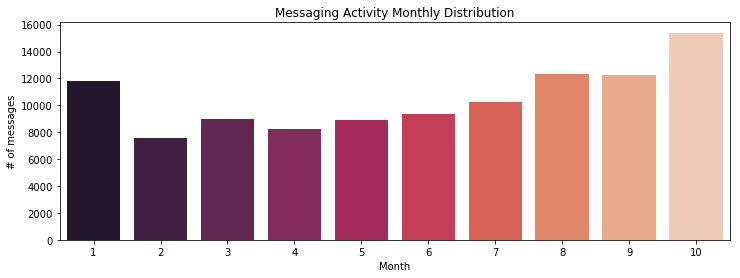

In [28]:
#analyze on the msg activities before experiment
msg_df_old = msg_df[msg_df['action_date'] < date(2017,11,12)]
msg_df_old['Month'] = msg_df_old['action_date'].apply(lambda x: x.month)

#plot to see the trend
plt.figure(figsize=(12,4))
sns.barplot(x=msg_df_old['Month'].value_counts().sort_index().index.tolist()[:10], y=msg_df_old['Month'].value_counts().sort_index().values.tolist()[:10], palette="rocket")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title("Messaging Activity Monthly Distribution")
plt.xlabel("Month")
plt.ylabel("# of messages")

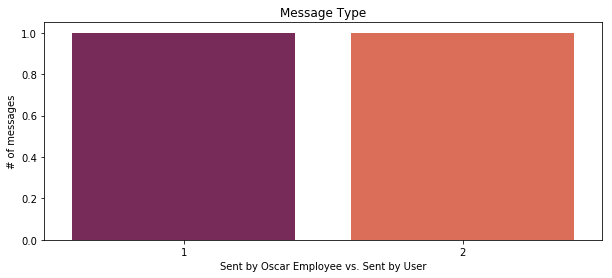

In [29]:
#plot type
plt.figure(figsize=(10,4))
sns.barplot(x=msg_df_old['sender_type'].value_counts().index.tolist(), y=msg_df_old['sender_type'].value_counts().value_counts().values.tolist(), palette="rocket")
plt.title("Message Type")
plt.xlabel("Sent by Oscar Employee vs. Sent by User")
plt.ylabel("# of messages")

In [30]:
msg_count_distribution = msg_df_old.groupby(['sender_user_id'])['message_id'].count().reset_index().rename(columns = {'message_id':'msg_count'}).groupby(['msg_count'])['sender_user_id'].count()

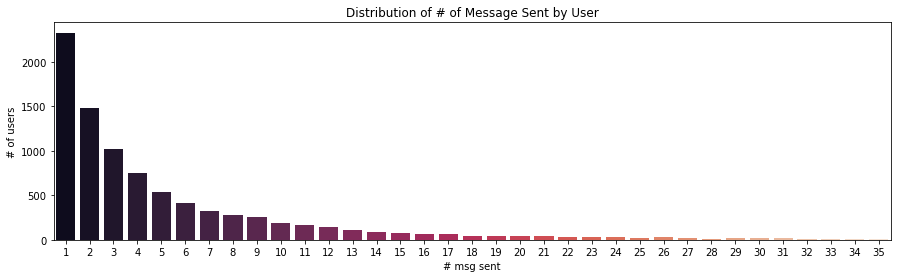

In [31]:
#plot to see the trend
#only plot the top 50 #msg sent since it is a long right tail distribution
plt.figure(figsize=(15,4))
sns.barplot(x=msg_count_distribution.index.tolist()[:35], y=msg_count_distribution.values.tolist()[:35], palette="rocket")
plt.title("Distribution of # of Message Sent by User")
plt.xlabel("# msg sent")
plt.ylabel("# of users")

### Summary:

1. There are null values and duplicated user_id in the dataset, so I dropped those values.
2. No overlap between two audience group; # of users are almost evenly split(dark: 17413; light: 17522)
3. In experiment_action table, null values in 'new_thread' column happened when action = 'Clicked Messaging Button' or'Viewed Messaging Inbox'; so there is nothing to do with the null value here;
4. There is one user who is enrolled in the experiment on 2017-11-29 but the user's actions were tracked only on 2017-06-28; I assume this user to be inactive for a long time, so I removed this user from our experiment.
5. Our users were enrolled between 2017-11-12 and 2017-12-05; experiment actions were tracked between 2017-11-01 and 2017-12-06;
6. It is clear that we have control/treament group of users entrolled at different date, which makes it harder to control the date variable. Therefore, to truly test the difference between the two audience group, I would choose a pair of group users who enrolled on the same date
7. Before the experiment starts, the monthly trend for # of msg sent has a peak on Octobor, January the second;
8. If we look at the distribution of #msg sent, we could see that most users send 1 msg

## Step 2: Define Evaluating Metric

There are two things we want to measure here: Discoverbility and Usage;
<br><b>Discoverbility</b> could be meassured as: 
1. #of users who clicked on the button/total users;
2. #of users who sent at least 1 msg;
3. #of users who sent at least 1 msg/#of users who clicked on the button;

<br><b>Usage</b> coule be measured as:
1. average number of msg sent to Oscar employee;
2. average number of msg received by users;


### Understand User behaviors

In [32]:
df = subjects_df.merge(action_df,on = 'user_id',how = 'inner')
df['new_thread'] = df['new_thread'].replace([True,False],[1,0]).fillna(0)

In [33]:
#pick two cohort groups
cohort_1 = df[df['enrolled_date'] == date(2017,11,13)]
cohort_2 = df[df['enrolled_date'] == date(2017,11,14)]

temp1 = cohort_1.groupby(['audience_name','action_date','action'])['user_id'].nunique().reset_index()
temp1['Day_Count'] = temp1['action_date'].apply(lambda x: (x - date(2017,11,13)).days)

temp2 = cohort_2.groupby(['audience_name','action_date','action'])['user_id'].nunique().reset_index()
temp2['Day_Count'] = temp2['action_date'].apply(lambda x: (x - date(2017,11,14)).days)

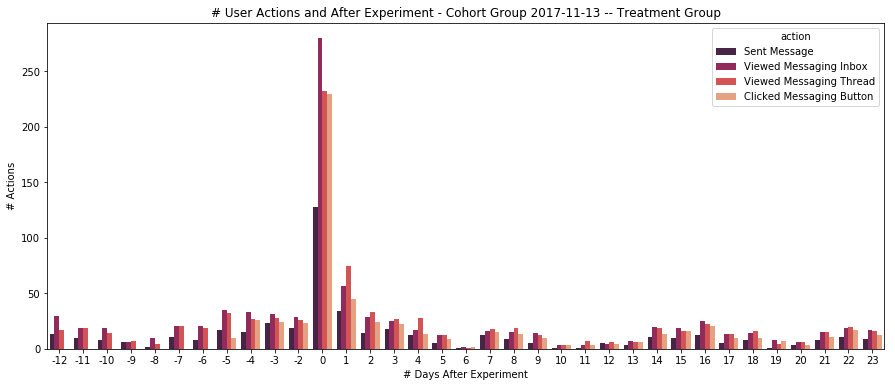

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x='Day_Count', y='user_id', hue = 'action',palette="rocket",data = temp1[temp1['audience_name'] == 'light'])
plt.title("# User Actions and After Experiment - Cohort Group 2017-11-13 -- Treatment Group")
plt.xlabel("# Days After Experiment")
plt.ylabel("# Actions")

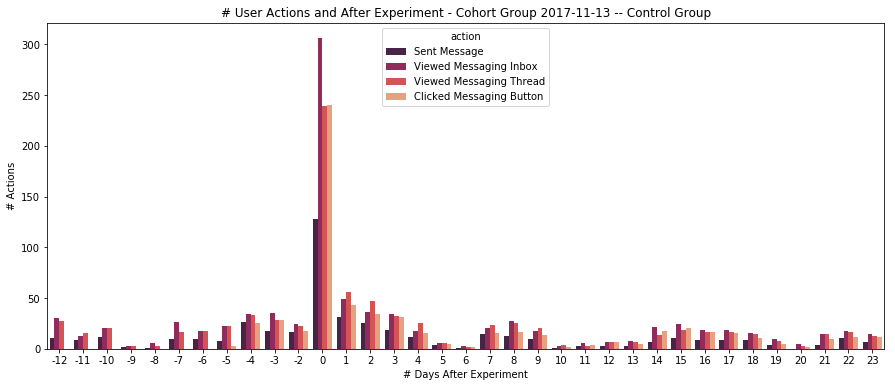

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(x='Day_Count', y='user_id', hue = 'action',palette="rocket",data = temp1[temp1['audience_name'] == 'dark'])
plt.title("# User Actions and After Experiment - Cohort Group 2017-11-13 -- Control Group")
plt.xlabel("# Days After Experiment")
plt.ylabel("# Actions")

In [36]:
temp1['Cohort_Group'] = '2017-11-13'
temp2['Cohort_Group'] = '2017-11-14'
temp = temp1.append(temp2)

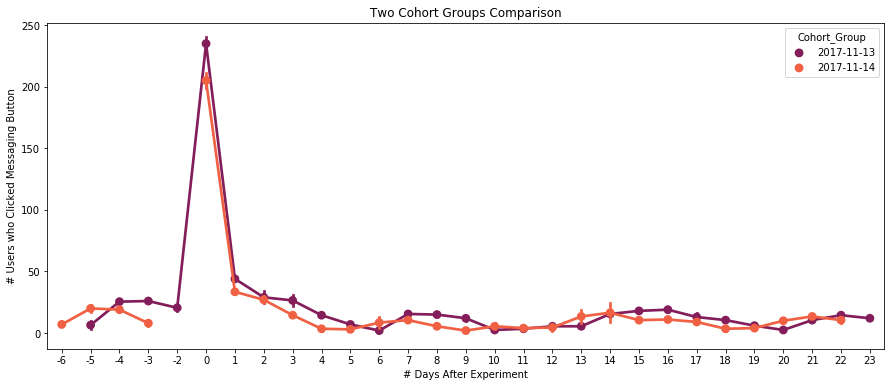

In [37]:
plt.figure(figsize=(15,6))
sns.pointplot(x='Day_Count', y='user_id', hue = 'Cohort_Group', palette="rocket",data = temp[temp['action'] == 'Clicked Messaging Button'])
plt.title("Two Cohort Groups Comparison")
plt.xlabel("# Days After Experiment")
plt.ylabel("# Users who Clicked Messaging Button")

#### Extract Sample

In [38]:
df_msg = subjects_df.merge(msg_df,left_on = 'user_id',right_on = 'sender_user_id',how = 'inner')
df_msg = df_msg[df_msg['recipient_user_id'].isnull() == True]

In [39]:
#extract users who enrolled from 2017-11-12 to 2017-11-30
#and only extract action data within 7 days after the experiement starts for each group
cohort_group_range = [date(2017,11,12) + datetime.timedelta(days=x) for x in range(0, 19)]
action_group_range = [x + datetime.timedelta(days=6) for x in cohort_group_range]

In [40]:
def extract_sample(cohort_group_range,action_group_range,df):
    result_df = pd.DataFrame()
    for i, date in enumerate(cohort_group_range):
        temp_df = df[(df['enrolled_date'] == date) & ((df['action_date'] >= date) & (df['action_date'] <= action_group_range[i]))]
        result_df = result_df.append(temp_df)
        
    return result_df

In [41]:
user_action_sample = extract_sample(cohort_group_range,action_group_range,df)
user_msg_sample = extract_sample(cohort_group_range,action_group_range,df_msg)

In [62]:
#check sample size
user_sample = subjects_df[(subjects_df['enrolled_date'] >= date(2017,11,12)) & (subjects_df['enrolled_date'] <= date(2017,11,30))]
user_sample['audience_name'].value_counts()

light    12987
dark     12904
Name: audience_name, dtype: int64

#### Discoverbility

In [43]:
user_action_sample[user_action_sample['action'].isin(['Clicked Messaging Button','Sent Message'])].groupby(['audience_name','action'])['user_id'].nunique()

audience_name  action                  
dark           Clicked Messaging Button    2836
               Sent Message                1191
light          Clicked Messaging Button    2489
               Sent Message                1468
Name: user_id, dtype: int64

In [104]:
user_action_sample[user_action_sample['action'].isin(['Clicked Messaging Button','Sent Message'])].groupby(['audience_name','action'])['user_id'].count()

audience_name  action                  
dark           Clicked Messaging Button    5209
               Sent Message                2246
light          Clicked Messaging Button    4787
               Sent Message                2518
Name: user_id, dtype: int64

#### Usage

In [44]:
user_msg_sample.groupby(['audience_name'])['message_id'].count()

audience_name
dark     3482
light    3833
Name: message_id, dtype: int64

In [45]:
user_msg_sample.groupby(['audience_name'])['user_id'].nunique()

audience_name
dark     1633
light    1881
Name: user_id, dtype: int64

In [46]:
user_rec_msg = subjects_df.merge(msg_df,left_on = 'user_id',right_on = 'recipient_user_id',how = 'inner')
user_rec_msg = user_rec_msg[user_rec_msg['sender_user_id'].isnull() == True]
user_rec_msg_sample = extract_sample(cohort_group_range,action_group_range,user_rec_msg)

In [47]:
user_rec_msg_sample.groupby(['audience_name'])['message_id'].count()

audience_name
dark     3633
light    3875
Name: message_id, dtype: int64

In [48]:
user_rec_msg.groupby(['audience_name'])['user_id'].nunique()

audience_name
dark     6824
light    7144
Name: user_id, dtype: int64

### Step3: Analyze Experiment Result

In [89]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import math
import scipy.stats as stats
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import weightstats as stests

#### Compare % users who clicked on the button 

In [105]:
z,p = proportions_ztest([2836,2497],[12904,12987], value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = 5.47227382864236 
 p-value = 4.442976060284203e-08


#### Compare % users who sent msg

In [106]:
z,p = proportions_ztest([1191,1472],[12904,12987], value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = -5.574332089183345 
 p-value = 2.48481336353396e-08


#### Compare average button clicked & average msg sent

In [95]:
actions = ['Clicked Messaging Button','Sent Message']
for action in actions:
    df1 = user_action_sample[user_action_sample['action'] == action].groupby(['user_id','audience_name']).size().reset_index(name='counts')
    df2 = user_sample[['user_id','audience_name']].merge(df1[['user_id','counts']],on='user_id',how = 'left').fillna(0)
    control = df2[df2['audience_name'] == 'dark']['counts']
    treatment = df2[df2['audience_name'] == 'light']['counts']
    print("Compare average {}".format(action))
    ztest ,pval1 = stests.ztest(control, x2 = treatment,value = 0, alternative='two-sided')
    print("z-stat = {z} \np-value = {p}".format(z = ztest, p = pval1))
    print("\n")

Compare average Clicked Messaging Button
z-stat = 2.571062720572423 
p-value = 0.010138696314012513


Compare average Sent Message
z-stat = -2.1957966368771835 
p-value = 0.028106502497347502




#### Compare % users who sent at least one msg

In [68]:
z,p = proportions_ztest([1633,1885],[12904,12987], value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = -4.365989887387325 
 p-value = 1.265483345066895e-05


#### Compare % useres who received at least one msg

In [67]:
z,p = proportions_ztest([6824,7154],[12904,12987], value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = -3.5561326190046385 
 p-value = 0.00037635414876300644


#### Compare average msg sent & average received 

In [103]:
msg_df = [user_msg_sample,user_rec_msg_sample]
for df in msg_df:
    df1 = df.groupby(['user_id']).size().reset_index(name='counts')
    df2 = user_sample[['user_id','audience_name']].merge(df1[['user_id','counts']],on='user_id',how = 'left').fillna(0)
    control = df2[df2['audience_name'] == 'dark']['counts']
    treatment = df2[df2['audience_name'] == 'light']['counts']

    ztest ,pval1 = stests.ztest(control, x2 = treatment,value = 0, alternative='two-sided')
    print("z-stat = {z} \np-value = {p}".format(z = ztest, p = pval1))
    print("\n")


z-stat = -1.9817702512230913 
p-value = 0.047504960439290325


z-stat = -1.630071827315069 
p-value = 0.10308631719008234


